First 5 rows of dataset:
   Study Hours  Previous Exam Score  Pass  Attendance
0     4.370861            81.889703     0   81.889703
1     9.556429            72.165782     1   72.165782
2     7.587945            58.571657     0   58.571657
3     6.387926            88.827701     1   88.827701
4     2.404168            81.083870     0   81.083870

Missing values:
Study Hours            0
Previous Exam Score    0
Pass                   0
Attendance             0
dtype: int64

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass                 500 non-null    int64  
 3   Attendance           500 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.8 KB
None
Columns: ['Study Hours', 'Previous Exam Sc

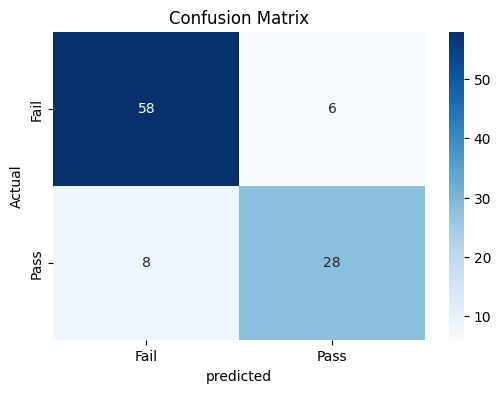

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#load dataset(Asssuming 'studentExam.csv' has columns: study_hours, Attendance, pass)
data = pd.read_csv('studentExam.csv')

#Display first few rows
print("First 5 rows of dataset:")
print(data.head())

# Display the misssing values
print('\nMissing values:')
print(data.isnull().sum())

#Display the information
print('\nData Information:')
print(data.info())


data.columns = data.columns.tolist()
print("Columns:", data.columns.tolist())

#definefeatures (X) and target variable (y)
X = data[['Study Hours', 'Attendance']]
y = data['Pass'] # Binary target (0= false, 1= true)

# Split data into training(80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Training sample: {X_train.shape[0]}, Testing sample: {X_test.shape[0]}")


#Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

#make predicions
y_pred = model.predict(X_test)

# print accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy: 2f}")


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


#plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"] )
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. Tokenize
    tokens = text.split()
    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # 5. Join back into string
    return " ".join(tokens)




# pip install nltk scikit-learn pandas numpy
import nltk
nltk.download('stopwords')



import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


#LOad dataset (Assuming 'reviews.csv' has columns: Review, sentiment)
df = pd.read_csv("IMDB Dataset.csv")

#Display first few rows
print("First few rows of dataset:")
print(df.head())

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
#check the missing values
print("\nMisssing Values:")
print(df.isnull().sum())

stop_word = set(stopwords.words("english"))


def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. Tokenize
    tokens = text.split()
    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # 5. Join back into string
    return " ".join(tokens)

#Function to clean and preprocess text
# Apply preprocessing
df['Cleaned_Review'] = df['review'].apply(preprocess_text)

print("\nPreprocessed Data:")
print(df[['review', 'Cleaned_Review']].head())

#convert text to numerical format using TF-IDF
# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)   # note: max_features not max_feature
X = vectorizer.fit_transform(df['Cleaned_Review']).toarray()

# Target variable (check if it's 'sentiment' or 'Sentiment')
y = df['sentiment']   # or df['Sentiment'] depending on your CSV

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training sample: {X_train.shape[0]}, Testing sample: {X_test.shape[0]}")

#Train the model 
model = LogisticRegression()
model.fit(X_train, y_train)

#make prediction
y_pred = model.predict(X_test)

#print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First few rows of dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Misssing Values:
review       0
sentiment    0
dtype: int64

Preprocessed Data:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      Cleaned_Review  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production br br filming tech...  
2  thought w